<a href="https://colab.research.google.com/github/shardul28/political-stance-detection/blob/Mscproject/19_shardul_msc_project_PoliticalStanceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mit-news-classify
from mitnewsclassify import tfidf as mitx

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import pandas as pd
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pickle
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.util import ngrams
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/project_data

/content/drive/MyDrive/project_data


In [ ]:
# infile = open('ndtv_data.pkl','rb')
# ndtv_df = pickle.load(infile)

In [ ]:
# ndtv_df=ndtv_df.head(1075)



In [ ]:
# ndtv_df=ndtv_df.dropna(subset=['content'])

In [ ]:
# ndtv_df.count()

In [ ]:
# df=ndtv_df
# df.rename(columns = {'left 0 right 1':'bias'}, inplace = True)
# df=df.fillna({'bias':3})##The dataset has labels for only bias news , so the rest data is center data. 
# df['bias']=df['bias'].astype(int)
# center = df.loc[df['content'].str.contains('shiv sena|shivsena|aap|bjp|congress|modi|gandhi', case=False)]
# center_without_bias_words = df.loc[~df['content'].str.contains('sena|shivsena|aap|bjp|congress|modi|gandhi|minister|aam|government|aadmi', case=False)]

# center_without_bias_words = center_without_bias_words.loc[center_without_bias_words['bias']==3]

# center = center.loc[center['bias']==3]
# right = df.loc[df['bias']==1]
# left = df.loc[df['bias']==0]
# df2=pd.concat([left,right,center_without_bias_words])
# with open('/content/drive/MyDrive/project_data/ndtv_data2.pkl', 'wb') as fid:
#       pickle.dump(df2, fid)

In [ ]:
# infile2 = open('republic_data.pkl','rb')
# republic_df = pickle.load(infile2)
# republic_df=republic_df.head(1075)



In [ ]:
# republic_df=republic_df.dropna(subset=['content'])


In [ ]:
# df=republic_df
# df.rename(columns = {'left 0 right 1':'bias'}, inplace = True)
# df=df.fillna({'bias':3})##The dataset has labels for only bias news , so the rest data is center data. 
# df['bias']=df['bias'].astype(int)
# center = df.loc[df['content'].str.contains('shiv sena|shivsena|aap|bjp|congress|modi|gandhi', case=False)]
# center_without_bias_words = df.loc[~df['content'].str.contains('sena|shivsena|aap|bjp|congress|modi|gandhi|minister|aam|government|aadmi', case=False)]

# center_without_bias_words = center_without_bias_words.loc[center_without_bias_words['bias']==3]

# center = center.loc[center['bias']==3]
# right = df.loc[df['bias']==1]
# left = df.loc[df['bias']==0]
# df2=pd.concat([left,right,center_without_bias_words])
# with open('/content/drive/MyDrive/project_data/republic_data2.pkl', 'wb') as fid:
#       pickle.dump(df2, fid)

In [ ]:
# republic_df=republic_df.head(1075)
# ndtv_df=ndtv_df.head(1075)

In [ ]:
infile2 = open('republic_data2.pkl','rb')
republic_df = pickle.load(infile2)
infile = open('ndtv_data2.pkl','rb')
ndtv_df = pickle.load(infile)

In [ ]:
ndtv_df.count()

text              628
url               628
title             628
content           628
bias              628
retweet_count     628
favorite_count    628
source_name       628
source            628
dtype: int64

In [ ]:
republic_df.count()

text              630
url               630
title             630
content           630
bias              630
retweet_count     630
favorite_count    630
source_name       630
source            630
dtype: int64

In [ ]:
df=pd.concat([ndtv_df,republic_df])

In [ ]:
#REINDEXING
indx=[]
for i in range(len(df)):
  indx.append(i)
df.index=indx

In [ ]:
print(df.isna().sum())


text              0
url               0
title             0
content           0
bias              0
retweet_count     0
favorite_count    0
source_name       0
source            0
dtype: int64


CLEANING


In [ ]:
df=df.dropna(subset=['content'])
print(df.isna().sum())


text              0
url               0
title             0
content           0
bias              0
retweet_count     0
favorite_count    0
source_name       0
source            0
dtype: int64


In [ ]:
df.rename(columns = {'left 0 right 1':'bias'}, inplace = True)
df=df.fillna({'bias':3})##The dataset has labels for only bias news , so the rest data is center data. 
df['bias']=df['bias'].astype(int)

In [ ]:
df

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0
...,...,...,...,...,...,...,...,...,...
1253,T20 World Cup: Jos Buttler confident 'England ...,https://www.republicworld.com/sports-news/cric...,T20 World Cup: Jos Buttler Confident 'England ...,"englandâ€™s wicketkeeper batter, jos buttler h...",3,0.0,25.0,republictv,1
1254,"ATL Space Challenge 2021: CBSE, ISRO team up t...",https://www.republicworld.com/india-news/educa...,"ATL Space Challenge 2021: CBSE, ISRO Team Up T...",atal innovation mission (aim) has started the ...,3,1.0,19.0,republictv,1
1255,DU Admissions 2021: Online application for DU ...,https://www.republicworld.com/india-news/educa...,DU Admissions 2021: Online Application For DU ...,the delhi university will commence admissions ...,3,0.0,13.0,republictv,1
1256,NCB continues searches on Cordelia Cruise ship...,https://www.republicworld.com/entertainment-ne...,Mumbai drugs bust: NCB Continues Searches On C...,"in a big development in the mumbai drugs bust,...",3,33.0,144.0,republictv,1


In [ ]:
df['source_name'].unique()

array(['ndtv', 'republictv'], dtype=object)

In [ ]:
df['source_name'].value_counts()


republictv    630
ndtv          628
Name: source_name, dtype: int64

In [ ]:
 df.loc[df['source_name']=='ndtv']['bias'].value_counts()

3    357
0    170
1    101
Name: bias, dtype: int64

In [ ]:
 df.loc[df['source_name']=='republictv']['bias'].value_counts()


3    454
0     93
1     83
Name: bias, dtype: int64

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
df['source_name'].unique()

array(['ndtv', 'republictv'], dtype=object)

<Figure size 720x360 with 0 Axes>

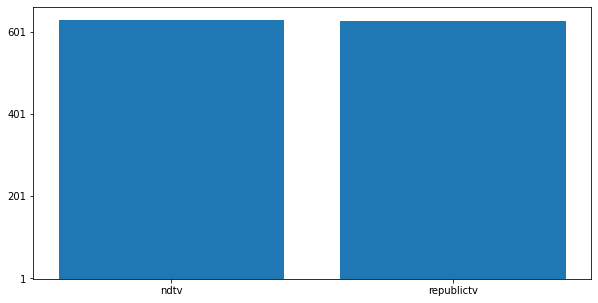

In [ ]:
##ALL WITH THE TWITTER DATA
##RETWEETS
fig = plt.figure(figsize = (10, 5))
 
source = df['source_name']
#bias= df['bias']
# creating the bar plot
plt.figure(figsize = (10, 5), facecolor = None)
plt.yticks(ticks=np.arange(1,1000,200))
plt.bar(df['source_name'].unique(),df['source_name'].value_counts())
plt.show()

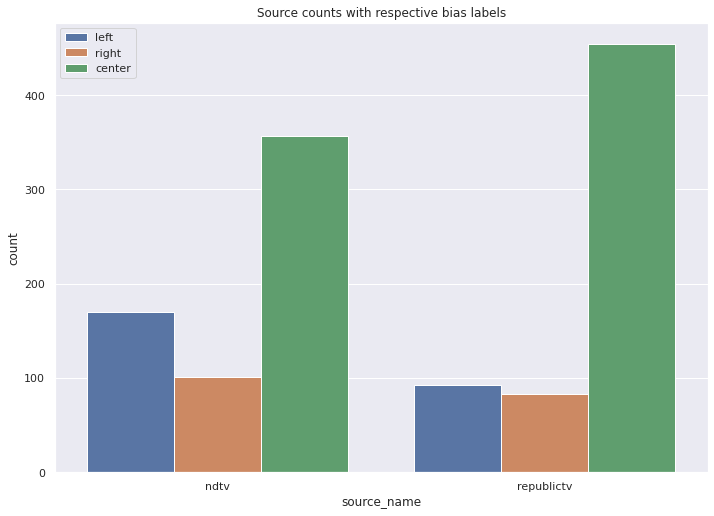

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="source_name",hue='bias' ,data=df).set(title='Source counts with respective bias labels')
plt.legend(labels=["left","right","center"])

In [ ]:
# A list of common english words which should not affect predictions
stopwordslist = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves','state','said','saturday','thursday','wednesday','monday','tuesday','sunday','friday','like','official'
             'earlier','earlier','person','video','hour','poll', 'case','event']
             

In [ ]:
final_stop_words =list(set( stopwords.words('english')+stopwordslist+['including','seat','family','time','new','people','country','state','mr','day','october','year','india','an','today','ndtv', 'ndtvfeed','republic','tv','republictv','story','edited','staff','syndicated','published','headline','feed']))

In [ ]:
### Dataset Preprocessing
corpus = []
for i in range(0, len(df)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', df['content'][i])
    review = re.sub('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]"',' ',review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in final_stop_words]
    review = ' '.join(review)
    corpus.append(review)
df['clean_content']=corpus

In [ ]:
lemmer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['text_lemmatized'] = df.clean_content.apply(lemmatize_text)

In [ ]:
def cleaning_lemmatize_text(text):
    #return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return[word for word in text if not word in final_stop_words]
df['clean_text_lemmatized'] = df.text_lemmatized.apply(cleaning_lemmatize_text)

In [ ]:
for i in tqdm(range(len(df['clean_text_lemmatized']))):
    x=df['clean_text_lemmatized'][i]
    review=" ".join(x)
    df['clean_text_lemmatized'][i] = review

  0%|          | 0/1258 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 1258/1258 [00:00<00:00, 1620.47it/s]


In [ ]:
df.head(50)

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...
5,"RT @ndtvfeed: Your Leaves Cancelled, UP Police...",https://www.ndtv.com/india-news/up-police-canc...,"Your Leaves Cancelled, UP Police To Staff Amid...",uttar pradesh police has cancelled all types o...,0,4.0,0.0,ndtv,0,uttar pradesh police cancelled types leaves ti...,"[uttar, pradesh, police, cancelled, type, leaf...",uttar pradesh police cancelled type leaf till ...
6,#MaharashtraBandh Live Updates: Several Trade ...,https://ndtv.com/india-news/maharashtra-bandh-...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,17.0,90.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...
7,RT @ndtvfeed: Why Isn't Centre Removing Minist...,https://www.ndtv.com/india-news/why-centre-is-...,Why Isn't Centre Removing Minister Over Farmer...,following the lakhimpur kheri incident in whic...,0,25.0,0.0,ndtv,0,following lakhimpur kheri incident farmers die...,"[following, lakhimpur, kheri, incident, farmer...",following lakhimpur kheri incident farmer died...
8,RT @ndtvfeed: A Day May Come When Government W...,https://www.ndtv.com/india-news/a-day-may-come...,A Day May Come When Government Will Be Sold To...,samajwadi party chief akhilesh yadav sunday at...,0,58.0,0.0,ndtv,0,samajwadi party chief akhilesh yadav attacked ...,"[samajwadi, party, chief, akhilesh, yadav, att...",samajwadi party chief akhilesh yadav attacked ...
9,RT @ndtvfeed: UP's Lakhimpur Kheri Incident: C...,https://www.ndtv.com/india-news/ups-kheri-inci...,UP's Lakhimpur Kheri Incident: Congress Leader...,senior congress leader p chidambaram along wit...,0,10.0,0.0,ndtv,0,senior congress leader p chidambaram congress ...,"[senior, congress, leader, p, chidambaram, con...",senior congress leader p chidambaram congress ...


In [ ]:
infile = open('/content/drive/MyDrive/project_data/model_data.pkl','rb')
df = pickle.load(infile)

# LDA TOPIC MODELLING

In [ ]:
https://colab.research.google.com/drive/1z4Pe4rtnu6XVEIVC2e5vTj0XMVytlCnj?usp=sharing

In [ ]:
infile = open('/content/drive/MyDrive/project_data/final_data.pkl','rb')
df = pickle.load(infile)

# MIT NEWS CLASSIFY


In [ ]:
# MIT News Classify is a package containing several natural language processing (NLP) and ML-based models that have been finetuned on an Annotated Corpus and its predefined news tags.

In [ ]:
df['content'][0]

'china has won the artificial intelligence battle with the united states and is heading towards global dominance because of its technological advances, the pentagon\'s former software chief told the financial times. china, the world\'s second largest economy, is likely to dominate many of the key emerging technologies, particularly artificial intelligence, synthetic biology and genetics within a decade or so, according to western intelligence assessments. nicolas chaillan, the pentagon\'s first chief software officer who resigned in protest against the slow pace of technological transformation in the u.s. military, said the failure to respond was putting the united states at risk. "we have no competing fighting chance against china in 15 to 20 years. right now, it\'s already a done deal; it is already over in my opinion," he told the newspaper. "whether it takes a war or not is kind of anecdotal." china was set to dominate the future of the world, controlling everything from media narr

In [ ]:
mitx.gettags(df['content'][0])

The model files have not been downloaded and the methods will not work. Would you like to download them? [y/n] y
Package directory: /usr/local/lib/python3.7/dist-packages/mitnewsclassify


model_2500_500_50.h5?dl=1: 100%|██████████| 121M/121M [00:03<00:00, 32.0MB/s]


small_vocab_20.csv?dl=1: 100%|██████████| 32.8k/32.8k [00:01<00:00, 29.8kB/s]


tfmer_20.p?dl=1: 100%|██████████| 57.3k/57.3k [00:01<00:00, 47.5kB/s]


labelsdict_20.p?dl=1: 100%|██████████| 16.4k/16.4k [00:01<00:00, 15.1kB/s]


nyt-theme-tags.csv?dl=1: 100%|██████████| 24.6k/24.6k [00:01<00:00, 21.9kB/s]


Initializing...
Model...
Count Vectorizer...
TF-IDF Transformer...
Miscellaneous...


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


['suspensions, dismissals and resignations',
 'armament, defense and military forces']

In [ ]:
df['content'][3]

'petrol, diesel price today: petrol prices touched new highs on monday, october 11, as rates were hiked for the seventh straight day. in the national capital, petrol prices crossed the Ã¢â€šÂ¹ 104-mark as they were hiked by 30 paise from Ã¢â€šÂ¹ 104.14 per litre to cost Ã¢â€šÂ¹ 104.44 per litre, while diesel rates were hiked by 35 paise from Ã¢â€šÂ¹ 92.82 to cost Ã¢â€šÂ¹ 93.17, according to indian oil corporation. in mumbai, petrol prices crossed the Ã¢â€šÂ¹ 110-mark after rates were hiked by 29 paise to cost Ã¢â€šÂ¹ 110.41 per litre, while diesel rates were hiked by 37 paise to cost Ã¢â€šÂ¹ 101.03 per litre. among the four metro cities, fuel rates are the highest in mumbai, according to the state-run oil refiner. fuel rates vary across the states due to value-added tax or vat. (also read: how to check latest petrol and diesel rates in your city). state-run oil refiners such as indian oil, bharat petroleum, and hindustan petroleum revise the fuel rates on a daily basis, by taking into 

In [ ]:
mitx.gettags(df['clean_content'][3])


['oil (petroleum) and gasoline', 'prices (fares, fees and rates)']

In [ ]:
# ##the MIT PACKAGE IDENTIFIES TAGS AS BOTH THE ORIGINAL TAG AND WITH UNITED TAGS
# for ex.
# ['united states politics and government',
#  'politics and government',
#  'united states international relations',
#  'international relations']
#  this can be just 
#  ['politics and government',
#  'international relations']
listx=[]
for x1 in range(len(df)):
  templist=[]
  test=mitx.gettags(df['content'][x1])
  for temp in test:
    if temp.find("united states") != -1:
      continue
    else:
      templist.append(temp)
  listx.append(templist)

In [ ]:
df['tags']=listx

# Sentiment Analysis

In [ ]:
# VADER works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.Therefore we will use TextBlob.
from textblob import TextBlob

In [ ]:
(df['clean_content'][0])

'china artificial intelligence battle united states heading global dominance technological advances pentagon software chief told financial times china world second largest economy likely dominate key emerging technologies particularly artificial intelligence synthetic biology genetics decade according western intelligence assessments nicolas chaillan pentagon chief software officer resigned protest slow pace technological transformation u military failure respond putting united states risk competing fighting chance china years right deal opinion told newspaper takes war kind anecdotal china set dominate future world controlling media narratives geopolitics chaillan blamed sluggish innovation reluctance u companies google work ai extensive ethical debates technology google immediately available comment outside business hours chinese companies chaillan obliged work government making massive investment ai regard ethics u cyber defences government departments kindergarten level chaillan an

In [ ]:
TextBlob(df['clean_content'][0]).sentiment.subjectivity
#TextBlob(ndf['content'][0]).sentiment.subjectivity


0.39430641821946166

In [ ]:
TextBlob(df['clean_content'][0]).sentiment.polarity

-0.023084886128364384

Polarity

In [ ]:
listx=[]
for x1 in range(len(df)):
  listx.append(TextBlob(df['clean_content'][x1]).sentiment.polarity)
df['polarity']=listx


In [ ]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
df["polarity_score"] = df["polarity"].apply(getAnalysis)


In [ ]:
df.head(5)

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...,"[agriculture, farmers]",0.062500,Positive
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...,"[oil (petroleum) and gasoline, prices (fares, ...",-0.012500,Negative
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...,[],-0.077778,Negative


Subjectivity

In [ ]:
listx=[]
for x1 in range(len(df)):
  listx.append(TextBlob(df['clean_content'][x1]).sentiment.subjectivity)
df['subjectivity']=listx


In [ ]:
df.head()

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score,subjectivity
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative,0.394306
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive,0.452806
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...,"[agriculture, farmers]",0.062500,Positive,0.300000
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...,"[oil (petroleum) and gasoline, prices (fares, ...",-0.012500,Negative,0.531250
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...,[],-0.077778,Negative,0.233333


In [ ]:
def getsubAnalysis(score):
  if score > 0.5:
    return "High subjectivity"
  else:
    return "Low subjectivity"

In [ ]:
df["subjectivity_score"] = df["subjectivity"].apply(getsubAnalysis)


In [ ]:
df.head()

,text,url,title,content,bias,retweet_count,favorite_count,source_name,source,clean_content,text_lemmatized,clean_text_lemmatized,tags,polarity,polarity_score,subjectivity,subjectivity_score
0,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,0,5.0,0.0,ndtv,0,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...",china artificial intelligence battle united he...,"[suspensions, dismissals and resignations, arm...",-0.023085,Negative,0.394306,Low subjectivity
1,"Karnataka Minister's Bizarre Remarks On ""Moder...",https://www.ndtv.com/india-news/karnataka-mini...,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,0,13.0,71.0,ndtv,0,karnataka health minister dr k sudhakar claime...,"[karnataka, health, minister, dr, k, sudhakar,...",karnataka health minister dr k sudhakar claime...,[medicine and health],0.118816,Positive,0.452806,Low subjectivity
2,Agitation Will Continue Till Demands Are Met: ...,https://ndtv.com/india-news/agitation-will-con...,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,0,23.0,257.0,ndtv,0,farmers agitation continue till demands met re...,"[farmer, agitation, continue, till, demand, me...",farmer agitation continue till demand met repe...,"[agriculture, farmers]",0.062500,Positive,0.300000,Low subjectivity
3,"Petrol, Diesel Prices Hit New Highs https://t....",https://www.ndtv.com/business/petrol-and-diese...,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",0,17.0,119.0,ndtv,0,petrol diesel price petrol prices touched high...,"[petrol, diesel, price, petrol, price, touched...",petrol diesel price petrol price touched high ...,"[oil (petroleum) and gasoline, prices (fares, ...",-0.012500,Negative,0.531250,High subjectivity
4,#MaharashtraBandh Today In Solidarity With Far...,https://www.ndtv.com/india-news/maharashtra-ba...,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,0,21.0,78.0,ndtv,0,bus services affected maharashtra shops commer...,"[bus, service, affected, maharashtra, shop, co...",bus service affected maharashtra shop commerci...,[],-0.077778,Negative,0.233333,Low subjectivity


In [ ]:
with open('/content/drive/MyDrive/project_data/data_with_classification_and_sentiment.pkl', 'wb') as fid:
     pickle.dump(df, fid)

In [ ]:
infile = open('/content/drive/MyDrive/project_data/data_with_classification_and_sentiment.pkl','rb')
df = pickle.load(infile)

In [ ]:
right = df.loc[df['bias']==1]
left = df.loc[df['bias']==0]
center = df.loc[df['bias']==3]

In [ ]:
df["bias_name"] = df["bias"].map(dict(zip([0,1,3],['left','right','center'])))

# VISUALIZATION

In [ ]:
df.columns

Index(['text', 'url', 'title', 'content', 'bias', 'retweet_count',
       'favorite_count', 'source_name', 'source', 'clean_content',
       'text_lemmatized', 'clean_text_lemmatized', 'tags', 'polarity',
       'polarity_score', 'subjectivity', 'subjectivity_score', 'topic'],
      dtype='object')

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 2.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
def common_topics_plot(df, political_affiliation, first_):
    word_list = []
    for row in tqdm(df):
        for words in df:
             word_list.append(words)
    # word_list = [word for l in word_list for word in l]
    
    counter = Counter(word_list)
    common_ = counter.most_common()
    word = []
    count = []
    for common_word, word_count in common_:
            word.append(common_word)
            count.append(word_count)
         #print(common_word)
    plt.figure(figsize=(15,9))
    sns.barplot(count[:first_],word[:first_]).set_title(f'Most Common Topics from the {political_affiliation}',fontsize=20)
    plt.xlabel("Words",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
def common_tags_plot(df, political_affiliation, first_):
    word_list = []
    for row in tqdm(df):
        for w in df:
          for words in w:
             word_list.append(words)
    # word_list = [word for l in word_list for word in l]
    
    counter = Counter(word_list)
    common_ = counter.most_common()
    word = []
    count = []
    for common_word, word_count in common_:
            word.append(common_word)
            count.append(word_count)
         #print(common_word)
    plt.figure(figsize=(15,9))
    sns.barplot(count[:first_],word[:first_]).set_title(f'Most Common Tags from the {political_affiliation}',fontsize=20)
    plt.xlabel("Words",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
def common_words_plot(df, political_affiliation, first_):
    stop_words=final_stop_words
    word_list = []
    lemmer = WordNetLemmatizer()
    for row in tqdm(df):
        words = [w for w in word_tokenize(row) if (w not in final_stop_words)]
        words = [lemmer.lemmatize(w) for w in words if (len(w) > 2)]
        word_list.append(words)
    word_list = [word for l in word_list for word in l]
    counter = Counter(word_list)
    common_ = counter.most_common()
    word = []
    count = []
    for common_word, word_count in common_:
        if common_word not in stop_words:
            word.append(common_word)
            count.append(word_count)
         #print(common_word)
    plt.figure(figsize=(15,9))
    sns.barplot(word[:first_], count[:first_]).set_title(f'Most Common Words from the {political_affiliation}',fontsize=20)
    plt.xlabel("Words",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from nltk.util import ngrams
def n_gram_plot(df, n, political_affiliation, first_):
    stop_words=final_stop_words
    print('vectorizing...')
    vec = CountVectorizer(ngram_range=(n, n),stop_words=final_stop_words).fit(df)
    print('transforming...')
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(axis=0)
    print('building frequency...')
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    x,y=map(list,zip(*words_freq))
    grams = 'Bigrams'
    if n == 3: grams = 'Trigrams'
    if n == 4: grams = 'Quadgrams'
    print('plotting...')
    plt.figure(figsize=(15,9))
    sns.barplot(y[:first_],x[:first_],palette="GnBu_d").set_title(f'Most Common {grams} from the {political_affiliation}',fontsize=20)
    plt.xlabel("Bigrams",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

100%|██████████| 263/263 [00:00<00:00, 6563.35it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

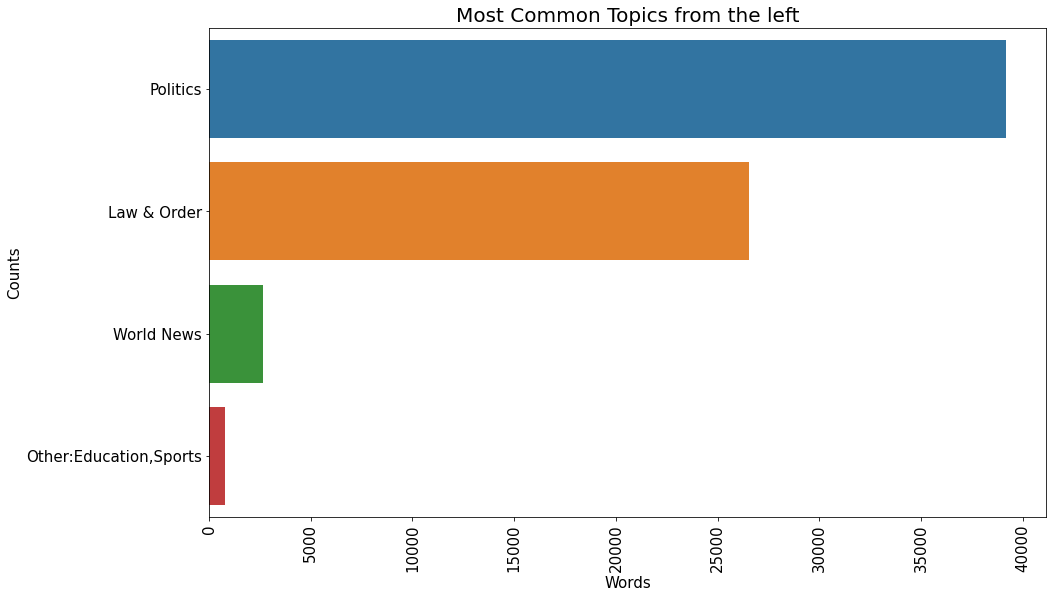

100%|██████████| 184/184 [00:00<00:00, 12531.29it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


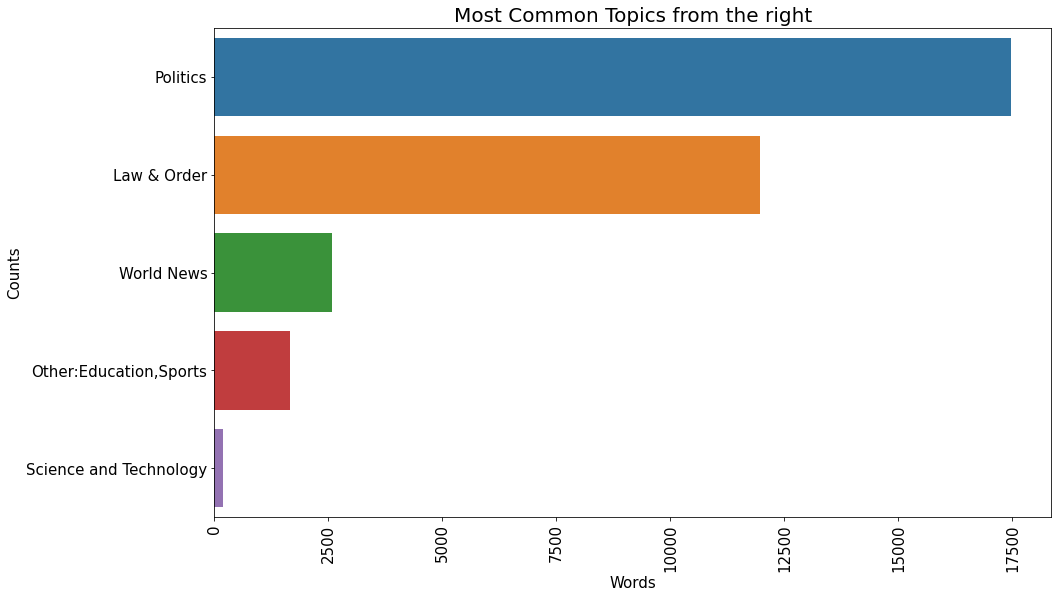

100%|██████████| 811/811 [00:00<00:00, 3320.58it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


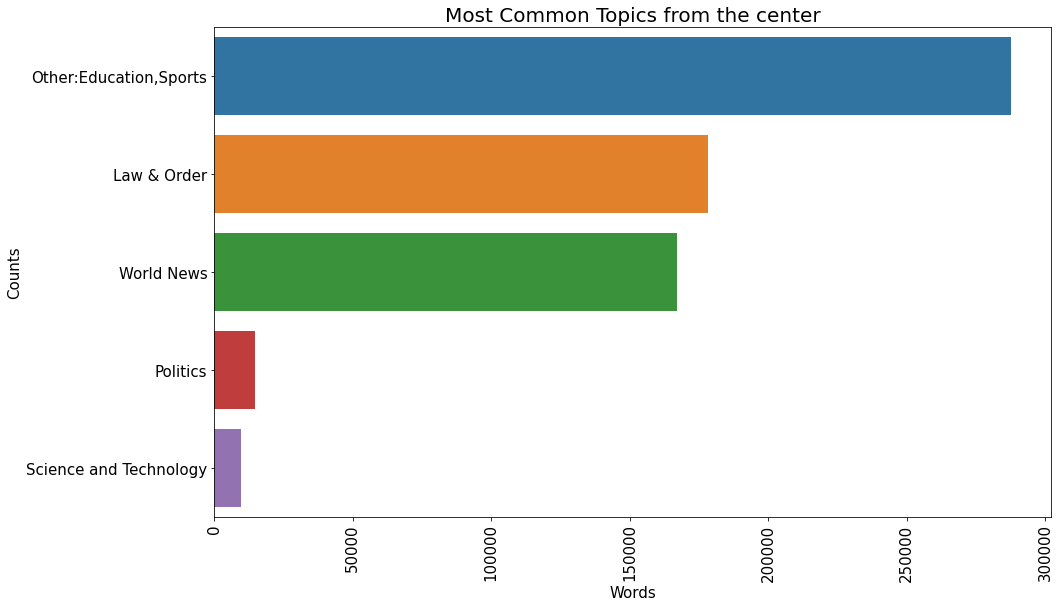

In [ ]:
##ALL WITH THE CLASSES(GENRE) DATA
fig = plt.figure(figsize = (10, 5))
common_topics_plot(left['topic'],'left',30)
common_topics_plot(right['topic'],'right',30)
common_topics_plot(center['topic'],'center',30)

100%|██████████| 263/263 [00:00<00:00, 11736.13it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

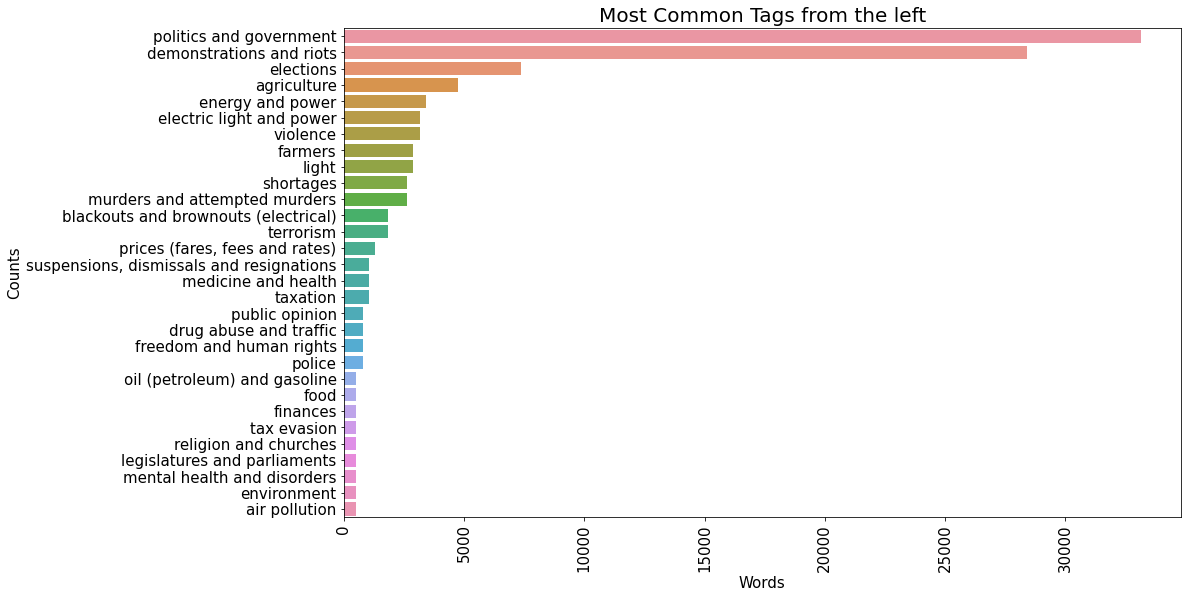

100%|██████████| 184/184 [00:00<00:00, 8865.72it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


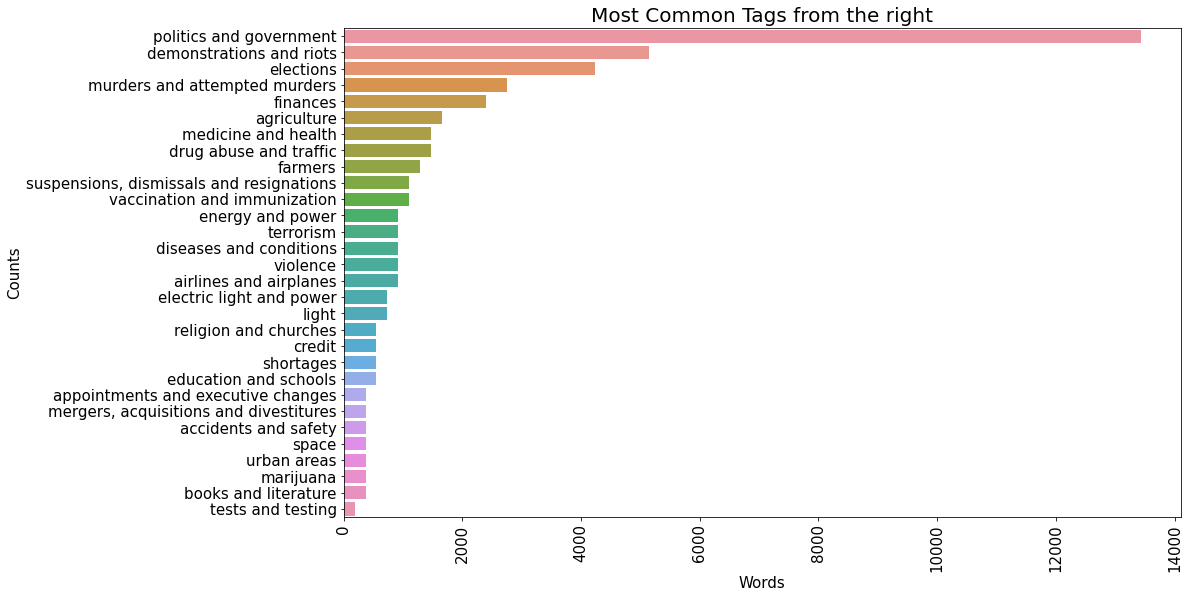

100%|██████████| 811/811 [00:00<00:00, 3766.87it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


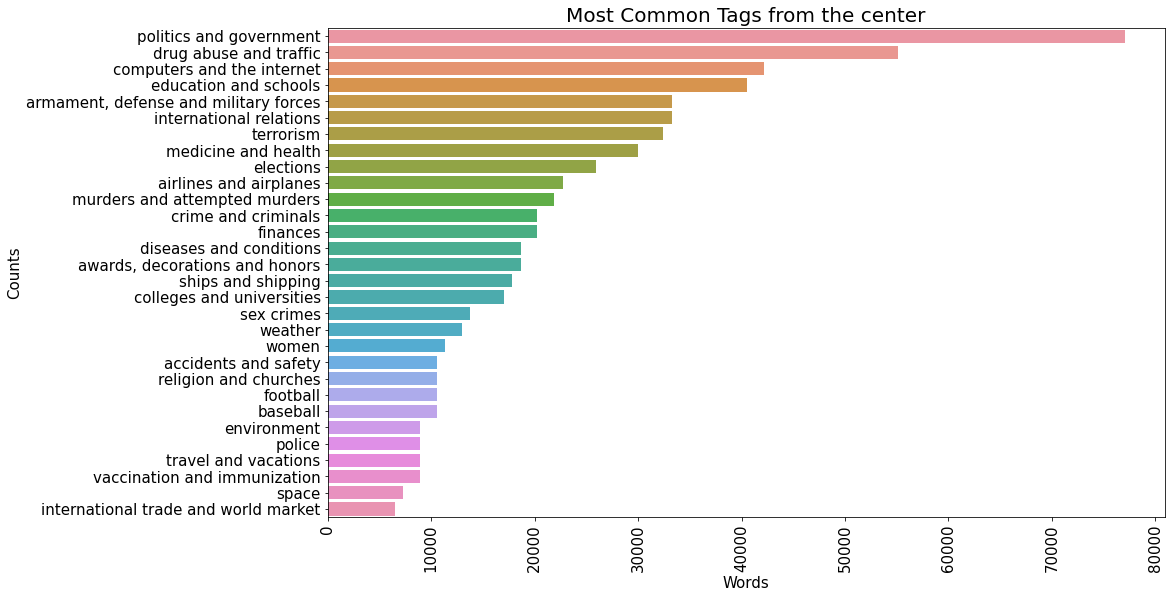

In [ ]:
##ALL WITH THE CLASSES(GENRE) DATA
fig = plt.figure(figsize = (10, 5))

common_tags_plot(left['tags'],'left',30)
common_tags_plot(right['tags'],'right',30)
common_tags_plot(center['tags'],'center',30)

100%|██████████| 263/263 [00:00<00:00, 287.33it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


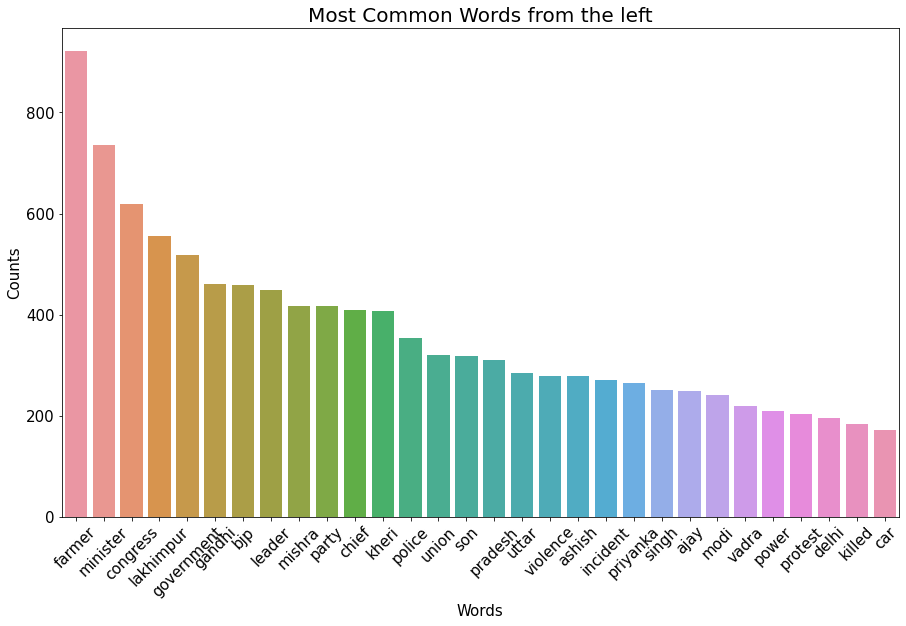

In [ ]:
common_words_plot(left['clean_content'],'left',30)

100%|██████████| 184/184 [00:00<00:00, 305.24it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


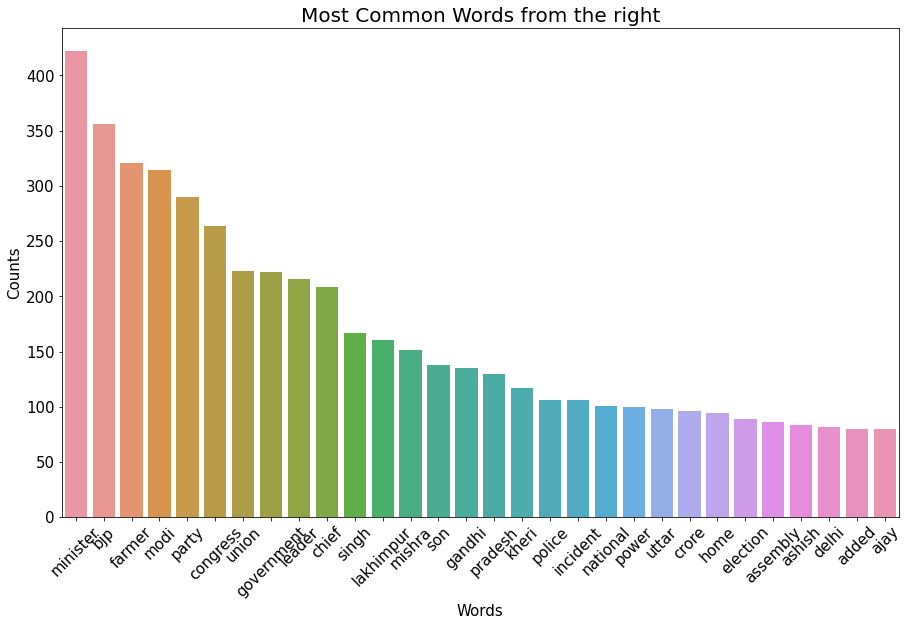

In [ ]:
common_words_plot(right['clean_content'],'right',30)

100%|██████████| 811/811 [00:02<00:00, 315.89it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


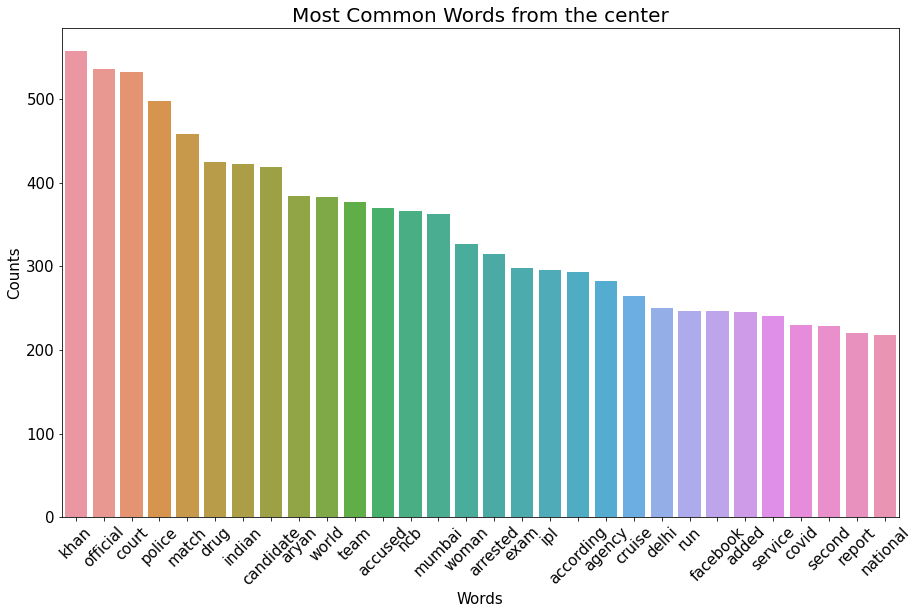

In [ ]:
common_words_plot(center['clean_content'],'center',30)

#BIGRAM COMMON WORDS

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


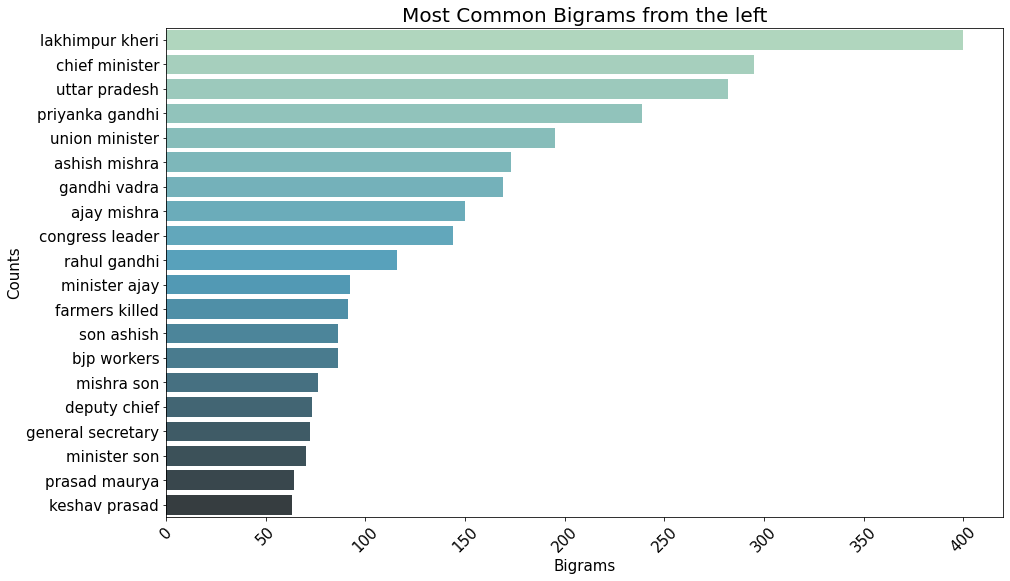

In [ ]:
##BIGRAM COMMON WORDS
n_gram_plot(left['clean_content'],2,'left',20)

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


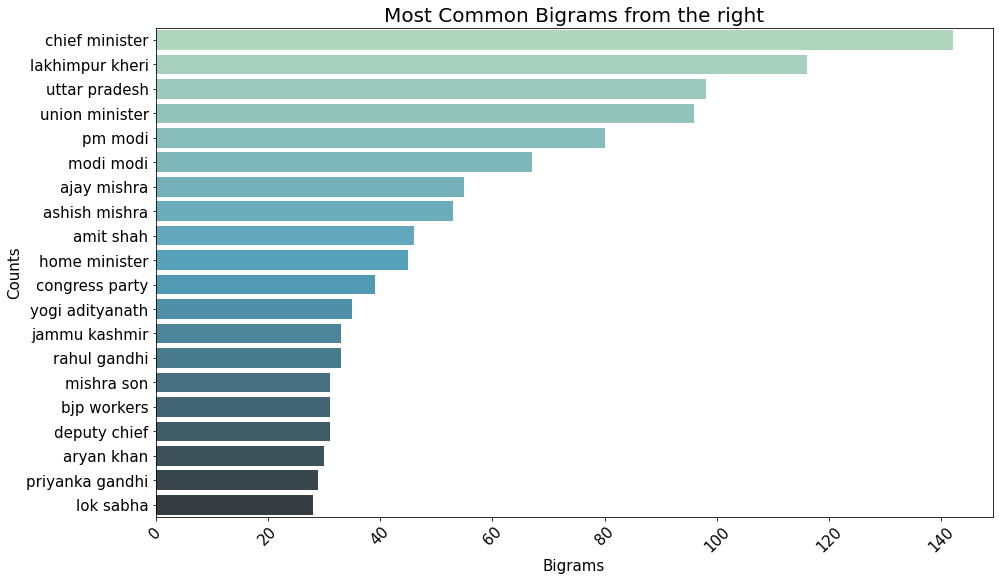

In [ ]:
n_gram_plot(right['clean_content'],2,'right',20)

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


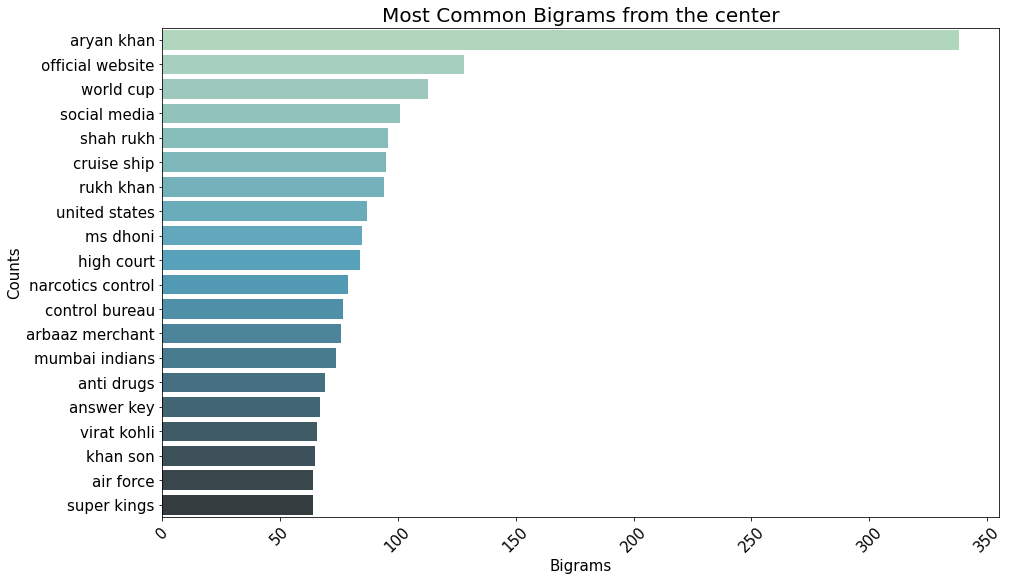

In [ ]:
n_gram_plot(center['clean_content'],2,'center',20)

# TRIGRAM COMMON WORDS

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


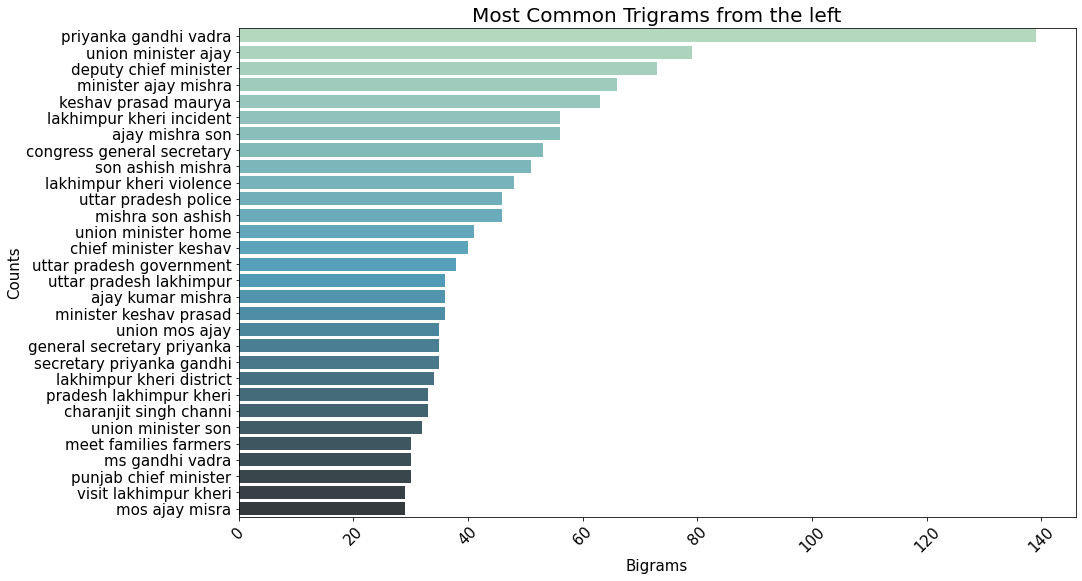

In [ ]:
##TRIGRAM COMMON WORDS
n_gram_plot(left['clean_content'],3,'left',30)

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


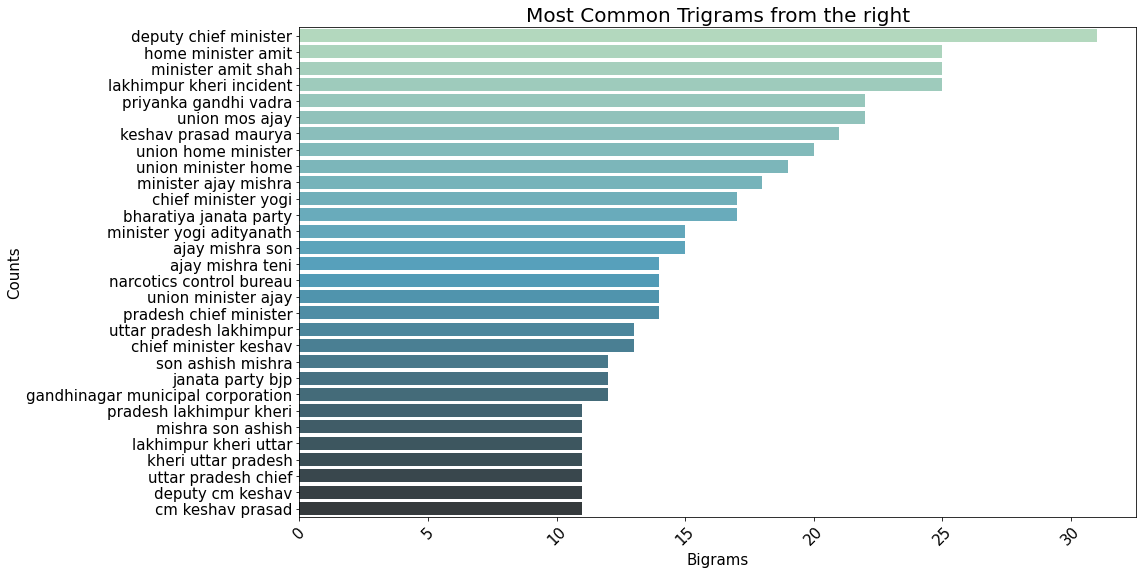

In [ ]:
n_gram_plot(right['clean_content'],3,'right',30)

vectorizing...
transforming...
building frequency...
plotting...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


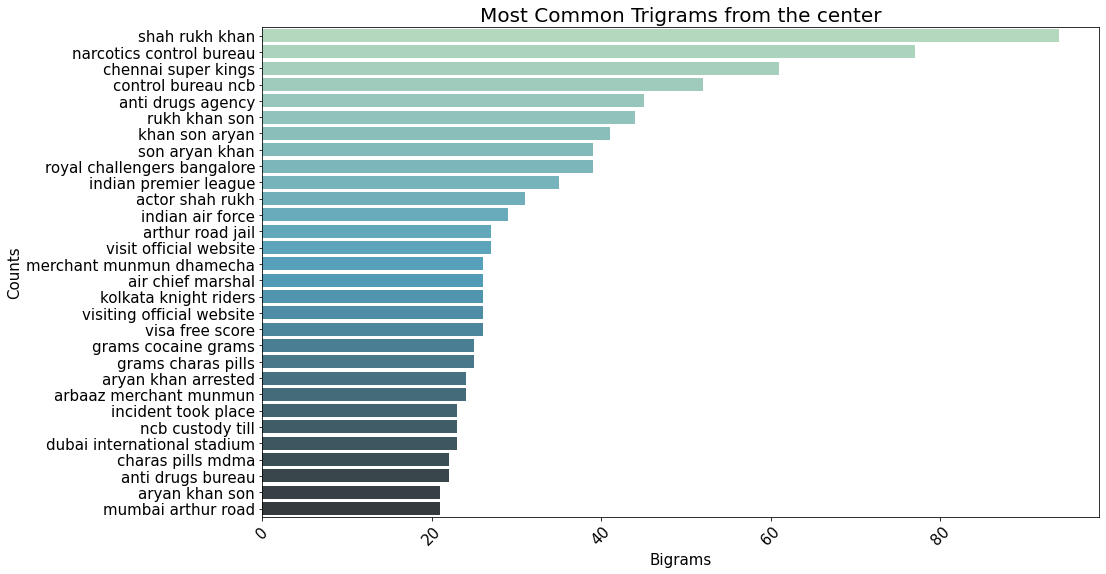

In [ ]:
n_gram_plot(center['clean_content'],3,'center',30)

# WORDCLOUD

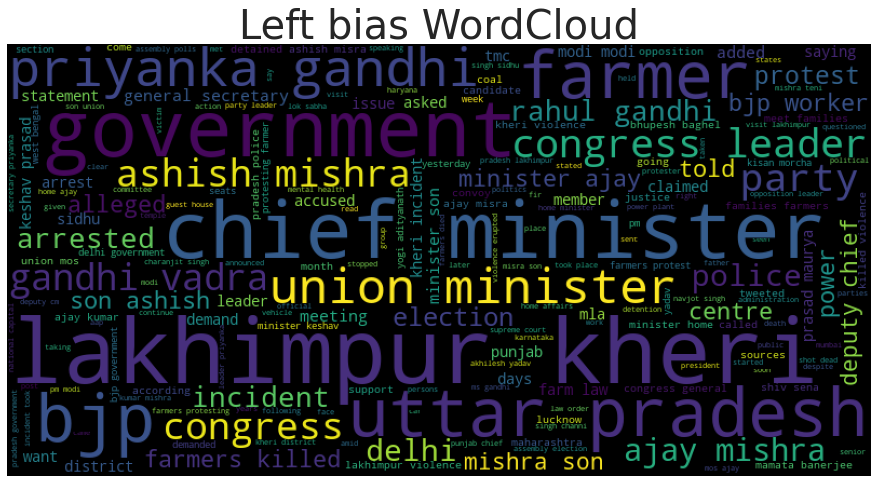

In [ ]:
from wordcloud import WordCloud
###LEFT WORDCLOUD
text = left['clean_content'].values 
wordcloud = WordCloud(width=800, height=400).generate(str(text))
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title(fontsize=40,label='Left bias WordCloud')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

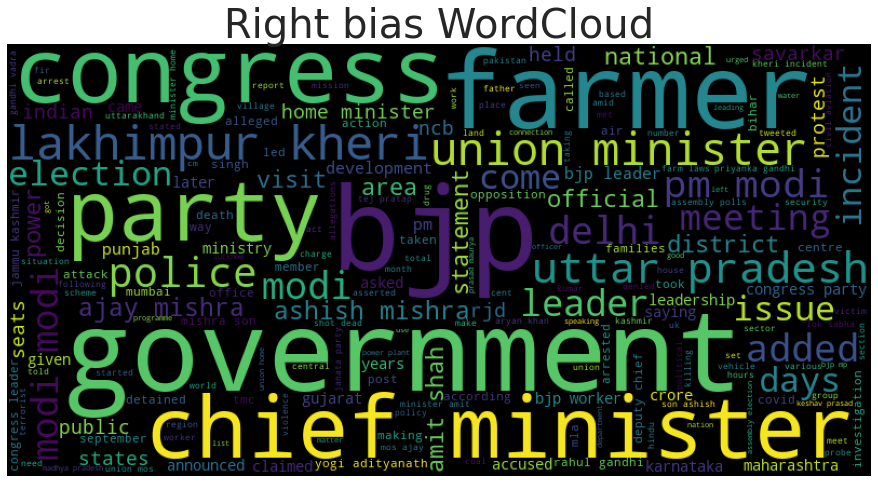

In [ ]:
###RIGHT WORDCLOUD
text = right['clean_content'].values 
wordcloud = WordCloud(width=800, height=400).generate(str(text))
plt.figure(figsize = (12, 10), facecolor = None)
plt.title(fontsize=40,label='Right bias WordCloud')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

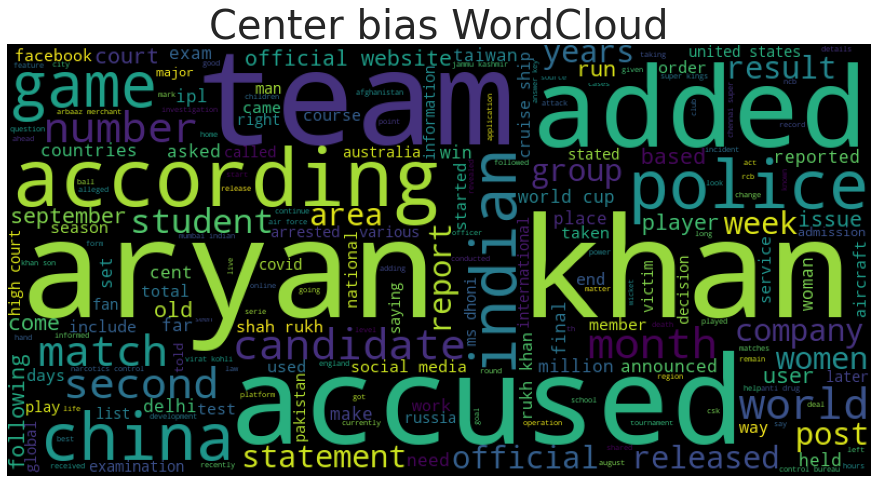

In [ ]:
###CENTER WORDCLOUD
text = center['clean_content'].values 
wordcloud = WordCloud(width=800, height=400).generate(str(text))
plt.figure(figsize = (12, 10), facecolor = None)
plt.title(fontsize=40,label='Center bias WordCloud')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

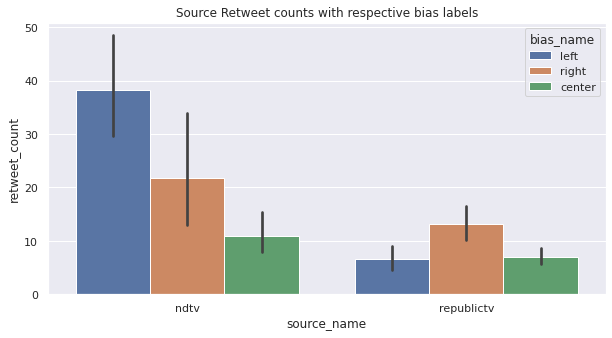

In [ ]:
##ALL WITH THE TWITTER DATA
##RETWEETS
fig = plt.figure(figsize = (10, 5))
 
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,10)})
ax = sns.barplot(x='source_name',y="retweet_count",hue='bias_name',data=df ).set(title='Source Retweet counts with respective bias labels')
plt.show(ax)

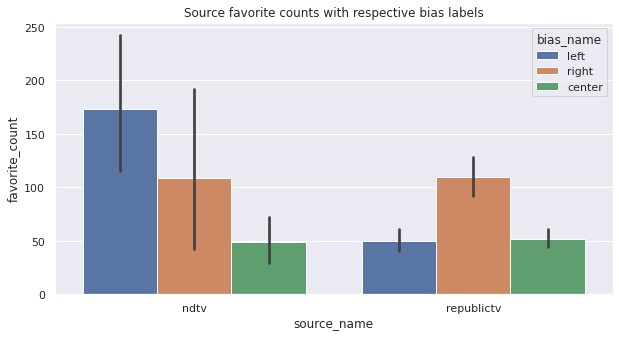

In [ ]:
##ALL WITH THE TWITTER DATA
##favourite count
fig = plt.figure(figsize = (10, 5))
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,10)})
ax = sns.barplot(x='source_name',y="favorite_count",hue='bias_name',data=df ).set(title='Source favorite counts with respective bias labels')
plt.show(ax)

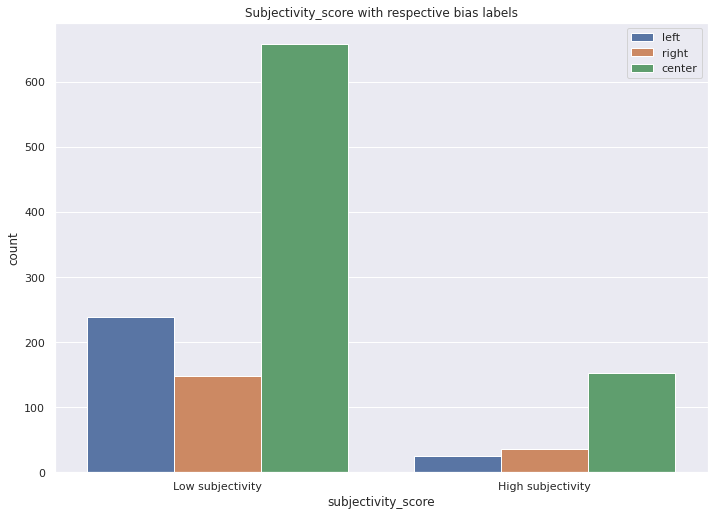

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="subjectivity_score",hue='bias' ,data=df).set(title='Subjectivity_score with respective bias labels')
plt.legend(labels=["left","right","center"])

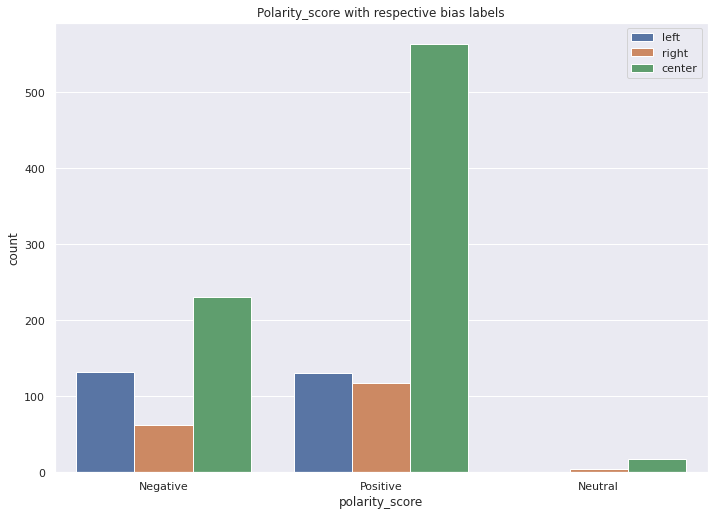

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="polarity_score",hue='bias' ,data=df).set(title='Polarity_score with respective bias labels')
plt.legend(labels=["left","right","center"])

In [ ]:
analysis = df.groupby(["topic"]).agg({
                                "retweet_count":"mean",
                                "favorite_count":"mean"
                              }).fillna(0)
analysis[["retweet_count","favorite_count"]] = analysis[["retweet_count","favorite_count"]]/2.5
analysis['topic']=['Law & Order','Other:Education,Sports	','Politics','Science and Technology','World News']
analysis

,retweet_count,favorite_count,topic
topic,,,
Law & Order,9.456995,46.464249,Law & Order
"Other:Education,Sports",1.886649,15.988011,"Other:Education,Sports\t"
Politics,7.519084,44.056489,Politics
Science and Technology,3.661538,26.123077,Science and Technology
World News,2.742609,10.253913,World News


In [ ]:
#REINDEXING
indx=[]
for i in range(len(analysis)):
  indx.append(i)
analysis.index=indx
analysis


,retweet_count,favorite_count,topic
0,9.456995,46.464249,Law & Order
1,1.886649,15.988011,"Other:Education,Sports\t"
2,7.519084,44.056489,Politics
3,3.661538,26.123077,Science and Technology
4,2.742609,10.253913,World News


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


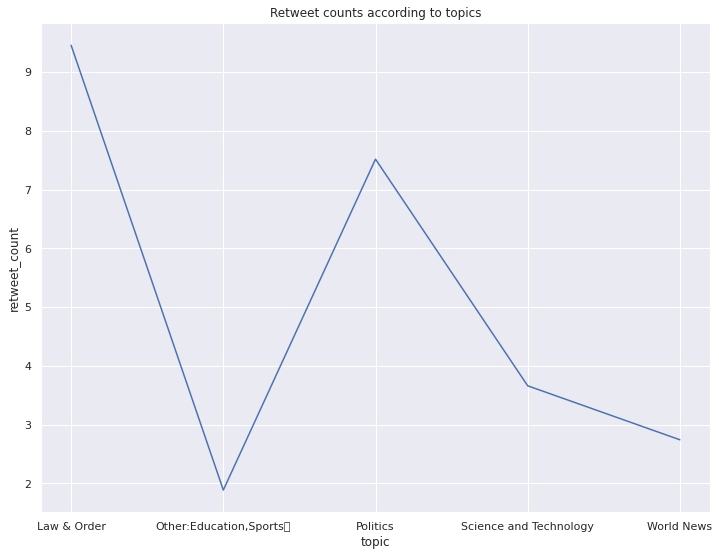

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.lineplot(x='topic',y="retweet_count",data=analysis).set(title='Retweet counts according to topics')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


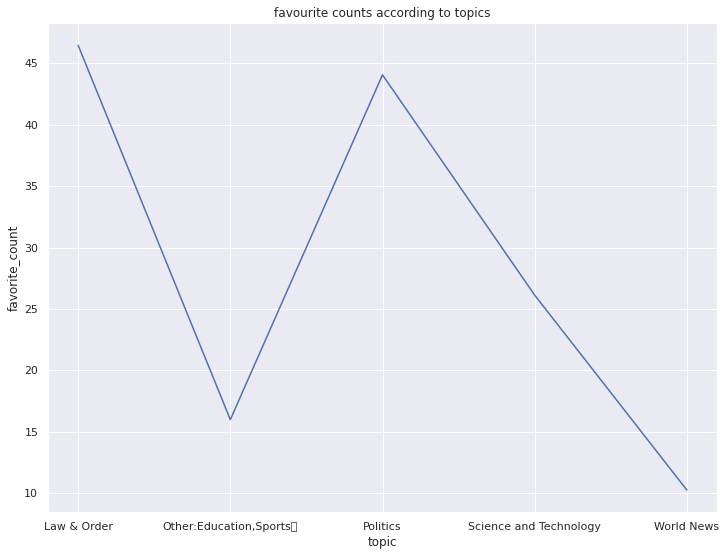

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.lineplot(x='topic',y="favorite_count",data=analysis).set(title='favourite counts according to topics')


In [ ]:
# with open('/content/drive/MyDrive/project_data/model_data.pkl', 'wb') as fid:
#       pickle.dump(df, fid)

In [ ]:
#df.loc[df['clean_content'].str.contains('india')]#, case=False)]

In [ ]:
infile = open('/content/drive/MyDrive/project_data/model_data.pkl','rb')
df = pickle.load(infile)

In [ ]:
///

# MODEL

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,classification_report,accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_data = df['clean_text_lemmatized']
y=df['bias']


In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=20000,ngram_range=(1,2))##35##69

In [ ]:
X=tfidf_v.fit_transform( df['clean_text_lemmatized']).toarray()

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 ,random_state=42,stratify=y)

In [ ]:
//

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aadmi,aadmi party,aakash,aam,aam aadmi,aap,aap government,aap leader,aaron,...,zone,zone adiz,zone police,zoology,zp,zuckerberg,zuckerberg facebook,zurich,zurich meeting,zverev
0,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.07645,0.07645,0.0,0.07645,0.07645,0.206117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RANDOM FOREST


[[ 79   2   6]
 [ 31  22   8]
 [  0   0 268]]
0.8870192307692307
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        87
           1       0.92      0.36      0.52        61
           3       0.95      1.00      0.97       268

    accuracy                           0.89       416
   macro avg       0.86      0.76      0.76       416
weighted avg       0.90      0.89      0.87       416



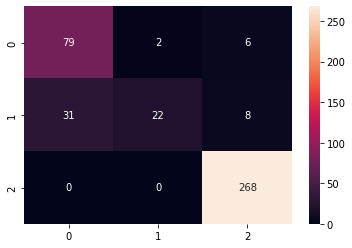

In [ ]:
rf_classifier=RandomForestClassifier().fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)
y.value_counts()
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))
sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='g')


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(100, 1000,100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=3,
                               random_state=43,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   random_state=43, verbose=3)

In [ ]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 670,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 300}

[[ 80   1   6]
 [ 31  23   7]
 [  0   0 268]]
Accuracy Score 0.8918269230769231
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.92      0.81        87
           1       0.96      0.38      0.54        61
           3       0.95      1.00      0.98       268

    accuracy                           0.89       416
   macro avg       0.88      0.77      0.78       416
weighted avg       0.91      0.89      0.88       416



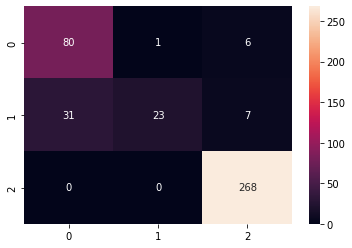

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n {}".format(classification_report(y_test,y_pred)))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')


# XGBOOST

xgb Accuracy Score ->  91.10576923076923
[[ 75  10   2]
 [ 23  36   2]
 [  0   0 268]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        87
           1       0.78      0.59      0.67        61
           3       0.99      1.00      0.99       268

    accuracy                           0.91       416
   macro avg       0.84      0.82      0.83       416
weighted avg       0.91      0.91      0.91       416



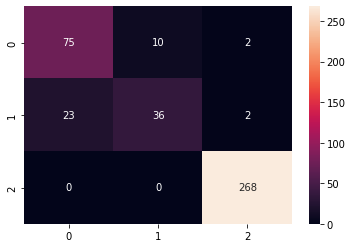

In [ ]:
from sklearn import model_selection, naive_bayes, svm
# fit the training dataset on the NB classifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier()#,random_state=5)

xgb.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_xgb = xgb.predict(X_test)
# Use accuracy_score function to get the accuracy
print("xgb Accuracy Score -> ",accuracy_score(predictions_xgb, y_test)*100)
print(confusion_matrix(y_test,predictions_xgb))
print(classification_report(y_test,predictions_xgb))
sns.heatmap(confusion_matrix(y_test,predictions_xgb), annot=True, fmt='g')


In [ ]:
params = {
 'learning_rate' : [float(x) for x in np.arange(0,1,0.05)],
 'max_depth' :[int(x) for x in np.arange(1,20,1)],# [ 3, 4, 5, 6, 8, 10, 12, 15,17,20],
 'min_child_weight' : [int(x) for x in np.arange(1,20,1)],# [ 1, 3, 5, 7,8,9,10 ],
 'gamma': [float(x) for x in np.arange(0,1,0.05)],#[ 0.0, 0.1, 0.2 , 0.3, 0.4 , 0.7],
 'colsample_bytree' :[float(x) for x in np.arange(0,1,0.05)],# [ 0.3, 0.4, 0.5 , 0.7, 0.10 ]
}


In [ ]:
rf_randomcv=RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=3)
#model fitting
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.0, 0.05, 0.1,
                                                             0.15000000000000002,
                                                             0.2, 0.25,
                                                             0.30000000000000004,
                                                             0.35000000000000003,
                                                             0.4, 0.45, 0.5,
                                                             0.55,
                                                             0.6000000000000001,
                                                             0.65,
                                                             0.7000000000000001,
                                                             0.75, 0.8,
                                                             0.8500000000000001,
      

In [ ]:
rf_randomcv.best_estimator_


XGBClassifier(colsample_bytree=0.55, gamma=0.25, learning_rate=0.8, max_depth=9,
              min_child_weight=14, objective='multi:softprob')

[[ 70  12   5]
 [ 22  37   2]
 [  0   0 268]]
Accuracy Score 0.9014423076923077
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        87
           1       0.76      0.61      0.67        61
           3       0.97      1.00      0.99       268

    accuracy                           0.90       416
   macro avg       0.83      0.80      0.81       416
weighted avg       0.90      0.90      0.90       416



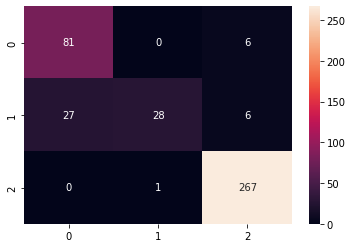

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n {}".format(classification_report(y_test,y_pred)))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')


In [ ]:
##STORING DATA
dfx=df
listx=best_random_grid.predict(X)
dfx['predicted']=listx

In [ ]:
dfx[['bias','predicted']]

,bias,predicted
0,0,0
1,0,0
2,0,0
3,0,3
4,0,0
...,...,...
1253,3,3
1254,3,3
1255,3,3
1256,3,3


In [ ]:
# from google.colab import files

# dfx.to_csv('df.csv')
# files.download('df.csv')